In [1]:
from pathlib import Path
import datajoint as dj

dj.config.load(
    Path("../dj_local_conf.json").absolute()
)  # load config for database connection info

# MUA Analysis and Detection

NOTE: This notebook is a work in progress. It is not yet complete and may contain errors.

In [2]:
from spyglass.spikesorting.spikesorting_merge import SpikeSortingOutput
import spyglass.spikesorting.v1 as sgs


nwb_copy_file_name = "mediumnwb20230802_.nwb"

sorter_keys = {
    "nwb_file_name": nwb_copy_file_name,
    "sorter": "clusterless_thresholder",
    "sorter_param_name": "default_clusterless",
}

(sgs.SpikeSortingSelection & sorter_keys) * SpikeSortingOutput.CurationV1

[2024-01-29 10:36:58,134][INFO]: Connecting root@localhost:3306
[2024-01-29 10:36:58,205][INFO]: Connected root@localhost:3306
[10:36:59][WARNING] Spyglass: Please update position_tools to >= 0.1.0


*sorting_id    *merge_id      recording_id   sorter         sorter_param_n nwb_file_name  interval_list_ curation_id   
+------------+ +------------+ +------------+ +------------+ +------------+ +------------+ +------------+ +------------+
08a302b6-5505- 485a4ddf-332d- 449b64e3-db0b- clusterless_th default_cluste mediumnwb20230 45f6b9a1-eef3- 0             
0ca508ee-af4c- 6acb99b8-6a0c- 328da21c-1d9c- clusterless_th default_cluste mediumnwb20230 686d9951-1c0f- 0             
209dc048-6fae- f7237e18-4e73- aff78f2f-2ba0- clusterless_th default_cluste mediumnwb20230 719e8a86-fcf1- 0             
21a9a593-f6f3- 7e3fa66e-727e- 2402805a-04f9- clusterless_th default_cluste mediumnwb20230 d581b117-160e- 0             
406a20e3-5a9f- 6d039a63-17ad- f1427e00-2974- clusterless_th default_cluste mediumnwb20230 0e848c38-9105- 0             
4131c51b-c56d- e0e9133a-7a4e- 9e332d82-1daf- clusterless_th default_cluste mediumnwb20230 9ed11db5-c42e- 0             
4c5a629a-71d9- 9959b614-2318- 3a2c3eed-413a- clusterless_th default_cluste mediumnwb20230 2b9fbf14-74a0- 0             
4d629c07-1931- c0eb6455-fc41- f07bc0b0-de6b- clusterless_th default_cluste mediumnwb20230 5c68f0f0-f577- 0             
554a9a3c-0461- 912e250e-56d8- 7f128981-6868- clusterless_th default_cluste mediumnwb20230 f4b9301f-bc91- 0             
7bb007f2-26d3- d7d2c97a-0e6e- a9b7cec0-1256- clusterless_th default_cluste mediumnwb20230 74270cba-36ee- 0             
80e1f37f-48a7- abb92dce-4410- 3c40ebdc-0b61- clusterless_th default_cluste mediumnwb20230 0f91197e-bebb- 0             
8848c4a8-a2f2- 74e10781-1228- 257c077b-8f3b- clusterless_th default_cluste mediumnwb20230 e289e03d-32ad- 0             
   ...
 (Total: 23)

In [3]:
spikesorting_merge_ids = (
    (sgs.SpikeSortingSelection & sorter_keys) * SpikeSortingOutput.CurationV1
).fetch("merge_id")

spikesorting_merge_ids

array([UUID('485a4ddf-332d-35b5-3ad4-0561736c1844'),
       UUID('6acb99b8-6a0c-eb83-1141-5f603c5895e0'),
       UUID('f7237e18-4e73-4aee-805b-90735e9147de'),
       UUID('7e3fa66e-727e-1541-819a-b01309bb30ae'),
       UUID('6d039a63-17ad-0b78-4b1e-f02d5f3dbbc5'),
       UUID('e0e9133a-7a4e-1321-a43a-e8afcb2f25da'),
       UUID('9959b614-2318-f597-6651-a3a82124d28a'),
       UUID('c0eb6455-fc41-c200-b62e-e3ca81b9a3f7'),
       UUID('912e250e-56d8-ee33-4525-c844d810971b'),
       UUID('d7d2c97a-0e6e-d1b8-735c-d55dc66a30e1'),
       UUID('abb92dce-4410-8f17-a501-a4104bda0dcf'),
       UUID('74e10781-1228-4075-0870-af224024ffdc'),
       UUID('8bbddc0f-d6ae-6260-9400-f884a6e25ae8'),
       UUID('614d796c-0b95-6364-aaa0-b6cb1e7bbb83'),
       UUID('b332482b-e430-169d-8ac0-0a73ce968ed7'),
       UUID('86897349-ff68-ac72-02eb-739dd88936e6'),
       UUID('4a712103-c223-864f-82e0-6c23de79cc14'),
       UUID('cf858380-e8a3-49de-c2a9-1a277e307a68'),
       UUID('cc4ee561-f974-f8e5-0ea4-83185263a

In [4]:
from spyglass.spikesorting.unit_inclusion_merge import (
    ImportedUnitInclusionV1,
    UnitInclusionOutput,
)

ImportedUnitInclusionV1().insert_all_units(spikesorting_merge_ids)

UnitInclusionOutput.ImportedUnitInclusionV1() & [
    {"spikesorting_merge_id": id} for id in spikesorting_merge_ids
]

*merge_id      spikesorting_m unit_group_nam
+------------+ +------------+ +------------+
39b22078-84fa- 0751a1e1-a406- all units     
7bc69ef8-ae89- 485a4ddf-332d- all units     
2f6295c6-ad14- 4a712103-c223- all units     
7fa3c0ad-36a8- 4a72c253-b3ca- all units     
4b025478-ab06- 5c53bd33-d57c- all units     
9658d944-1f1f- 614d796c-0b95- all units     
76cb7574-a687- 6acb99b8-6a0c- all units     
87af74fa-a77e- 6d039a63-17ad- all units     
3cccfce5-dad9- 74e10781-1228- all units     
bbddf25f-d810- 7e3fa66e-727e- all units     
7887e5db-da1d- 86897349-ff68- all units     
1b7ba376-89f9- 8bbddc0f-d6ae- all units     
   ...
 (Total: 23)

In [5]:
from spyglass.spikesorting.unit_inclusion_merge import (
    ImportedUnitInclusionV1,
    UnitInclusionOutput,
)

ImportedUnitInclusionV1().insert_all_units(spikesorting_merge_ids)

UnitInclusionOutput.ImportedUnitInclusionV1() & [
    {"spikesorting_merge_id": id} for id in spikesorting_merge_ids
]

*merge_id      spikesorting_m unit_group_nam
+------------+ +------------+ +------------+
39b22078-84fa- 0751a1e1-a406- all units     
7bc69ef8-ae89- 485a4ddf-332d- all units     
2f6295c6-ad14- 4a712103-c223- all units     
7fa3c0ad-36a8- 4a72c253-b3ca- all units     
4b025478-ab06- 5c53bd33-d57c- all units     
9658d944-1f1f- 614d796c-0b95- all units     
76cb7574-a687- 6acb99b8-6a0c- all units     
87af74fa-a77e- 6d039a63-17ad- all units     
3cccfce5-dad9- 74e10781-1228- all units     
bbddf25f-d810- 7e3fa66e-727e- all units     
7887e5db-da1d- 86897349-ff68- all units     
1b7ba376-89f9- 8bbddc0f-d6ae- all units     
   ...
 (Total: 23)

In [6]:
from spyglass.spikesorting.analysis.v1.group import SortedSpikesGroup

unit_inclusion_merge_ids = (
    UnitInclusionOutput.ImportedUnitInclusionV1
    & [{"spikesorting_merge_id": id} for id in spikesorting_merge_ids]
).fetch("merge_id")

SortedSpikesGroup().create_group(
    group_name="test_group",
    nwb_file_name=nwb_copy_file_name,
    unit_inclusion_merge_ids=unit_inclusion_merge_ids,
)

group_key = {
    "nwb_file_name": nwb_copy_file_name,
    "sorted_spikes_group_name": "test_group",
}

SortedSpikesGroup & group_key

*nwb_file_name *sorted_spikes
+------------+ +------------+
mediumnwb20230 test_group    
 (Total: 1)

In [7]:
SortedSpikesGroup.Units() & group_key

*nwb_file_name *sorted_spikes *unit_inclusio
+------------+ +------------+ +------------+
mediumnwb20230 test_group     0363fb94-c5de-
mediumnwb20230 test_group     12da7476-bb70-
mediumnwb20230 test_group     151976b9-9dc6-
mediumnwb20230 test_group     1b7ba376-89f9-
mediumnwb20230 test_group     2f6295c6-ad14-
mediumnwb20230 test_group     357a0267-874e-
mediumnwb20230 test_group     39b22078-84fa-
mediumnwb20230 test_group     3cccfce5-dad9-
mediumnwb20230 test_group     4b025478-ab06-
mediumnwb20230 test_group     7591b69d-a902-
mediumnwb20230 test_group     76cb7574-a687-
mediumnwb20230 test_group     7887e5db-da1d-
   ...
 (Total: 23)

An example of how to get spike times

In [8]:
spike_times = SortedSpikesGroup.fetch_spike_data(group_key)
spike_times[0]

[2024-01-29 10:37:03,344][WARNING]: Skipped checksum for file with hash: 148d9058-e6dc-e959-4c4d-75db9aa0b6e4, and path: /Users/edeno/Documents/GitHub/spyglass/DATA/analysis/mediumnwb20230802/mediumnwb20230802_EF6N6XI3AH.nwb
[2024-01-29 10:37:03,720][WARNING]: Skipped checksum for file with hash: b4b6404f-aaf8-c4cc-9abe-ceea56e103f3, and path: /Users/edeno/Documents/GitHub/spyglass/DATA/analysis/mediumnwb20230802/mediumnwb20230802_O7ZZ0F1XN7.nwb
[2024-01-29 10:37:04,075][WARNING]: Skipped checksum for file with hash: 4357905c-c6b9-3990-4d62-740a54cfc667, and path: /Users/edeno/Documents/GitHub/spyglass/DATA/analysis/mediumnwb20230802/mediumnwb20230802_X84BYVM2B0.nwb
[2024-01-29 10:37:04,418][WARNING]: Skipped checksum for file with hash: ff81d274-17f7-702d-a2b4-92ac43c29316, and path: /Users/edeno/Documents/GitHub/spyglass/DATA/analysis/mediumnwb20230802/mediumnwb20230802_Y2YF504C5D.nwb
[2024-01-29 10:37:04,768][WARNING]: Skipped checksum for file with hash: 8993754e-7dbe-94a1-403d-8c5

array([1.62593570e+09, 1.62593570e+09, 1.62593570e+09, ...,
       1.62593718e+09, 1.62593718e+09, 1.62593718e+09])

In [9]:
from spyglass.position import PositionOutput

position_merge_id = (
    PositionOutput.TrodesPosV1
    & {
        "nwb_file_name": nwb_copy_file_name,
        "interval_list_name": "pos 0 valid times",
        "trodes_pos_params_name": "default_decoding",
    }
).fetch1("merge_id")

position_info = (
    (PositionOutput & {"merge_id": position_merge_id})
    .fetch1_dataframe()
    .dropna()
)
position_info

[10:37:11][WARNING] Spyglass: Upsampled position data, frame indices are invalid. Setting add_frame_ind=False
[2024-01-29 10:37:11,578][WARNING]: Skipped checksum for file with hash: 0cd40383-03e0-44ec-5dac-36c66063796a, and path: /Users/edeno/Documents/GitHub/spyglass/DATA/analysis/mediumnwb20230802/mediumnwb20230802_FUSH604NQA.nwb


position_x  position_y  orientation  velocity_x  velocity_y  \
time                                                                        
1.625936e+09  183.396148  194.044480    -1.421292    4.893770   -8.354365   
1.625936e+09  183.414273  194.013538    -1.420984    4.893770   -8.354365   
1.625936e+09  183.432398  193.982596    -1.420676    4.893770   -8.354365   
1.625936e+09  183.450524  193.951654    -1.420368    4.893770   -8.354365   
1.625936e+09  183.468649  193.920712    -1.420059    4.893770   -8.354365   
...                  ...         ...          ...         ...         ...   
1.625937e+09   38.376407  113.604645    -1.433903   -0.067077    0.026783   
1.625937e+09   38.376407  113.610601    -1.434247   -0.080849    0.043172   
1.625937e+09   38.376407  113.616556    -1.434589   -0.093116    0.058259   
1.625937e+09   38.376407  113.622511    -1.434930   -0.103935    0.072067   
1.625937e+09   38.376407  113.628467    -1.371597   -0.113366    0.084619   

                 speed  
time                    
1.625936e+09  9.682170  
1.625936e+09  9.682170  
1.625936e+09  9.682170  
1.625936e+09  9.682170  
1.625936e+09  9.682170  
...                ...  
1.625937e+09  0.072226  
1.625937e+09  0.091653  
1.625937e+09  0.109840  
1.625937e+09  0.126476  
1.625937e+09  0.141464  

[365438 rows x 6 columns]

In [10]:
time_ind_slice = slice(63_000, 70_000)
time = position_info.index[time_ind_slice]

SortedSpikesGroup.get_spike_indicator(group_key, time)

[2024-01-29 10:37:11,995][WARNING]: Skipped checksum for file with hash: 148d9058-e6dc-e959-4c4d-75db9aa0b6e4, and path: /Users/edeno/Documents/GitHub/spyglass/DATA/analysis/mediumnwb20230802/mediumnwb20230802_EF6N6XI3AH.nwb
[2024-01-29 10:37:12,247][WARNING]: Skipped checksum for file with hash: b4b6404f-aaf8-c4cc-9abe-ceea56e103f3, and path: /Users/edeno/Documents/GitHub/spyglass/DATA/analysis/mediumnwb20230802/mediumnwb20230802_O7ZZ0F1XN7.nwb
[2024-01-29 10:37:12,562][WARNING]: Skipped checksum for file with hash: 4357905c-c6b9-3990-4d62-740a54cfc667, and path: /Users/edeno/Documents/GitHub/spyglass/DATA/analysis/mediumnwb20230802/mediumnwb20230802_X84BYVM2B0.nwb
[2024-01-29 10:37:12,897][WARNING]: Skipped checksum for file with hash: ff81d274-17f7-702d-a2b4-92ac43c29316, and path: /Users/edeno/Documents/GitHub/spyglass/DATA/analysis/mediumnwb20230802/mediumnwb20230802_Y2YF504C5D.nwb
[2024-01-29 10:37:13,206][WARNING]: Skipped checksum for file with hash: 8993754e-7dbe-94a1-403d-8c5

array([[0., 0., 0., ..., 0., 1., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 1., 1.],
       ...,
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

[2024-01-29 10:37:18,728][WARNING]: Skipped checksum for file with hash: 148d9058-e6dc-e959-4c4d-75db9aa0b6e4, and path: /Users/edeno/Documents/GitHub/spyglass/DATA/analysis/mediumnwb20230802/mediumnwb20230802_EF6N6XI3AH.nwb
[2024-01-29 10:37:18,988][WARNING]: Skipped checksum for file with hash: b4b6404f-aaf8-c4cc-9abe-ceea56e103f3, and path: /Users/edeno/Documents/GitHub/spyglass/DATA/analysis/mediumnwb20230802/mediumnwb20230802_O7ZZ0F1XN7.nwb
[2024-01-29 10:37:19,276][WARNING]: Skipped checksum for file with hash: 4357905c-c6b9-3990-4d62-740a54cfc667, and path: /Users/edeno/Documents/GitHub/spyglass/DATA/analysis/mediumnwb20230802/mediumnwb20230802_X84BYVM2B0.nwb
[2024-01-29 10:37:19,587][WARNING]: Skipped checksum for file with hash: ff81d274-17f7-702d-a2b4-92ac43c29316, and path: /Users/edeno/Documents/GitHub/spyglass/DATA/analysis/mediumnwb20230802/mediumnwb20230802_Y2YF504C5D.nwb
[2024-01-29 10:37:19,874][WARNING]: Skipped checksum for file with hash: 8993754e-7dbe-94a1-403d-8c5

Text(0.5, 0, 'time (s)')

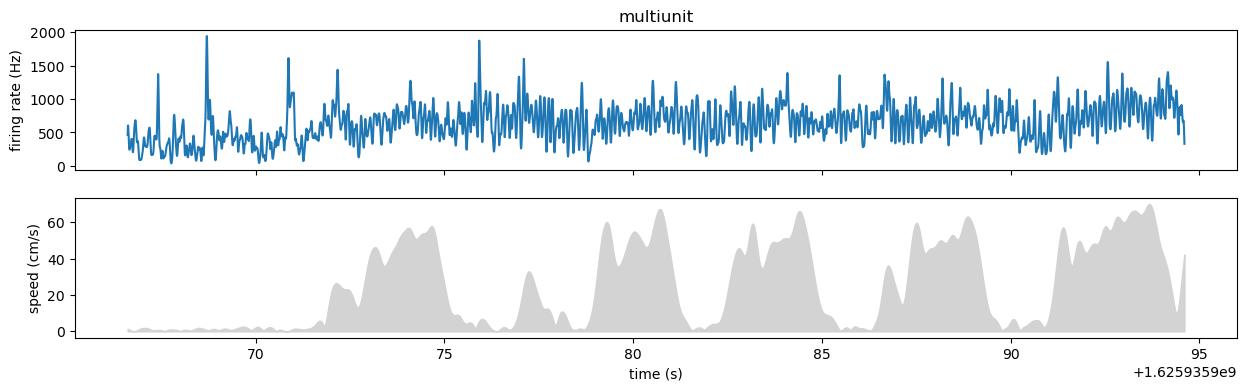

In [11]:
import matplotlib.pyplot as plt

fig, axes = plt.subplots(2, 1, sharex=True, figsize=(15, 4))
multiunit_firing_rate = SortedSpikesGroup.get_firing_rate(
    group_key, time, multiunit=True
)
axes[0].plot(
    time,
    multiunit_firing_rate,
)
axes[0].set_ylabel("firing rate (Hz)")
axes[0].set_title("multiunit")
axes[1].fill_between(
    time, position_info["speed"].iloc[time_ind_slice], color="lightgrey"
)
axes[1].set_ylabel("speed (cm/s)")
axes[1].set_xlabel("time (s)")

In [12]:
from spyglass.spikesorting.analysis.v1.mua import MuaEventsParameters, MuaEventsV1

MuaEventsParameters().insert_default()
MuaEventsParameters()

*mua_param_nam mua_param_
+------------+ +--------+
default        =BLOB=    
 (Total: 1)

In [13]:
selection_key = {
    "mua_param_name": "default",
    "nwb_file_name": nwb_copy_file_name,
    "sorted_spikes_group_name": "test_group",
    "pos_merge_id": position_merge_id,
}

MuaEventsV1.populate(selection_key)

In [14]:
MuaEventsV1 & selection_key

*mua_param_nam *nwb_file_name *sorted_spikes *pos_merge_id  analysis_file_ mua_times_obje
+------------+ +------------+ +------------+ +------------+ +------------+ +------------+
default        mediumnwb20230 test_group     6dfae23d-6034- mediumnwb20230 813cf5b3-1f1f-
 (Total: 1)

In [15]:
mua_times = (MuaEventsV1 & selection_key).fetch1_dataframe()
mua_times

[2024-01-29 10:37:25,850][WARNING]: Skipped checksum for file with hash: ca5f2044-7f84-1ca9-a288-c208261ccb7f, and path: /Users/edeno/Documents/GitHub/spyglass/DATA/analysis/mediumnwb20230802/mediumnwb20230802_MQU2DSMQL9.nwb


start_time      end_time  duration  mean_zscore  median_zscore  \
id                                                                      
0    1.625936e+09  1.625936e+09  0.084000     1.250994       1.225517   
1    1.625936e+09  1.625936e+09  0.068000     1.867170       1.994518   
2    1.625936e+09  1.625936e+09  0.128000     1.308437       1.048030   
3    1.625936e+09  1.625936e+09  0.260000     1.847013       2.225766   
4    1.625936e+09  1.625936e+09  0.092000     1.320218       1.367887   
..            ...           ...       ...          ...            ...   
212  1.625937e+09  1.625937e+09  0.228000     5.020090       4.976216   
213  1.625937e+09  1.625937e+09  0.303999     4.870160       4.968471   
214  1.625937e+09  1.625937e+09  0.140000     3.250498       3.146104   
215  1.625937e+09  1.625937e+09  0.060000     2.129116       2.216616   
216  1.625937e+09  1.625937e+09  0.104000     1.546942       1.681691   

     max_zscore  min_zscore  speed_at_start  speed_at_end  max_speed  \
id                                                                     
0      2.346275    0.026900        2.845775      1.442441   2.845775   
1      3.243124    0.061468        0.287511      0.116674   0.287511   
2      3.013205    0.022677        2.097526      1.261806   2.131399   
3      2.979140    0.028124        0.793993      0.523751   2.196469   
4      2.377142    0.021857        2.139993      1.304687   2.139993   
..          ...         ...             ...           ...        ...   
212   10.539919    0.239889        1.336351      0.441290   1.336351   
213    8.561497    0.129386        0.956787      0.408402   0.966132   
214    6.157476    0.122835        1.745086      2.199006   2.262194   
215    3.790466    0.127067        1.332429      1.077809   1.332429   
216    2.594644    0.007079        0.369586      0.185078   0.375829   

     min_speed  median_speed  mean_speed  
id                                        
0     1.352343      1.978832    2.010321  
1     0.116674      0.184148    0.190783  
2     1.261806      1.945054    1.848956  
3     0.523751      1.697052    1.616889  
4     1.142313      1.321552    1.465801  
..         ...           ...         ...  
212   0.389653      0.828371    0.804487  
213   0.170895      0.416961    0.540956  
214   1.745086      2.202081    2.125525  
215   1.077809      1.265536    1.242683  
216   0.183949      0.303257    0.291096  

[217 rows x 13 columns]

(1625935966.608866, 1625935994.6048138)

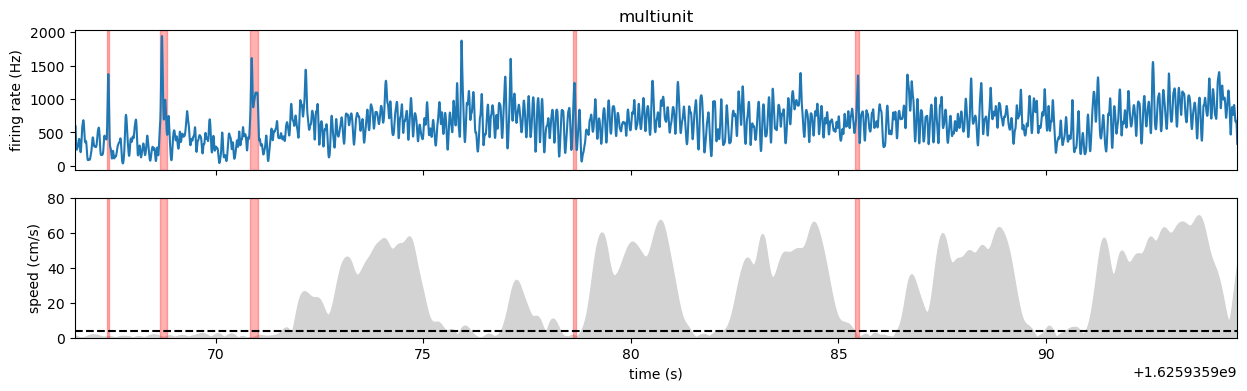

In [16]:
import matplotlib.pyplot as plt
import numpy as np

fig, axes = plt.subplots(2, 1, sharex=True, figsize=(15, 4))
axes[0].plot(
    time,
    multiunit_firing_rate,
)
axes[0].set_ylabel("firing rate (Hz)")
axes[0].set_title("multiunit")
axes[1].fill_between(
    time, position_info["speed"].iloc[time_ind_slice], color="lightgrey"
)
axes[1].set_ylabel("speed (cm/s)")
axes[1].set_xlabel("time (s)")

in_bounds = np.logical_and(
    mua_times.start_time >= time[0], mua_times.end_time <= time[-1]
)

for mua_time in mua_times.loc[in_bounds].itertuples():
    axes[0].axvspan(
        mua_time.start_time, mua_time.end_time, color="red", alpha=0.3
    )
    axes[1].axvspan(
        mua_time.start_time, mua_time.end_time, color="red", alpha=0.3
    )
axes[1].set_ylim((0, 80))
axes[1].axhline(4, color="black", linestyle="--")
axes[1].set_xlim((time[0], time[-1]))